**Exploring Data**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
## Intially we want to check the type of gpu is used
import os
!nvidia-smi

Sun Dec  3 15:30:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla T4            Off  | 00000000:00:05.0 Off |                    0 |
| N/A   

In [2]:
##Let's Assign train,test and validation directories
train_dir = "/kaggle/input/100-bird-species/train"
test_dir = "/kaggle/input/100-bird-species/test"
valid_dir = "/kaggle/input/100-bird-species/valid"

**Finding All the Species**

In [3]:
#Getting All Class Names 
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['ABBOTTS BABBLER' 'ABBOTTS BOOBY' 'ABYSSINIAN GROUND HORNBILL'
 'AFRICAN CROWNED CRANE' 'AFRICAN EMERALD CUCKOO' 'AFRICAN FIREFINCH'
 'AFRICAN OYSTER CATCHER' 'AFRICAN PIED HORNBILL' 'AFRICAN PYGMY GOOSE'
 'ALBATROSS' 'ALBERTS TOWHEE' 'ALEXANDRINE PARAKEET' 'ALPINE CHOUGH'
 'ALTAMIRA YELLOWTHROAT' 'AMERICAN AVOCET' 'AMERICAN BITTERN'
 'AMERICAN COOT' 'AMERICAN DIPPER' 'AMERICAN FLAMINGO'
 'AMERICAN GOLDFINCH' 'AMERICAN KESTREL' 'AMERICAN PIPIT'
 'AMERICAN REDSTART' 'AMERICAN ROBIN' 'AMERICAN WIGEON'
 'AMETHYST WOODSTAR' 'ANDEAN GOOSE' 'ANDEAN LAPWING' 'ANDEAN SISKIN'
 'ANHINGA' 'ANIANIAU' 'ANNAS HUMMINGBIRD' 'ANTBIRD' 'ANTILLEAN EUPHONIA'
 'APAPANE' 'APOSTLEBIRD' 'ARARIPE MANAKIN' 'ASHY STORM PETREL'
 'ASHY THRUSHBIRD' 'ASIAN CRESTED IBIS' 'ASIAN DOLLARD BIRD'
 'ASIAN GREEN BEE EATER' 'ASIAN OPENBILL STORK' 'AUCKLAND SHAQ'
 'AUSTRAL CANASTERO' 'AUSTRALASIAN FIGBIRD' 'AVADAVAT' 'AZARAS SPINETAIL'
 'AZURE BREASTED PITTA' 'AZURE JAY' 'AZURE TANAGER' 'AZURE TIT'
 'BAIKAL TEAL' 'BALD EAGLE

**Viewing the random images in the dataset**

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

In [5]:
##Let us importing all the required libraries
import random
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from keras import layers,mixed_precision
from shutil import copyfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Image shape: (224, 224, 3)


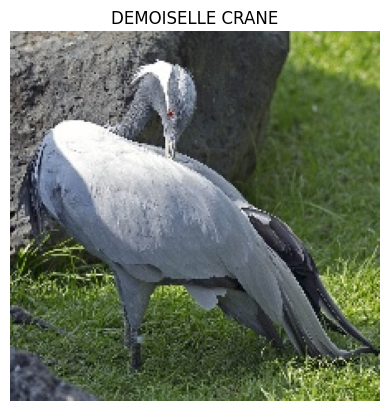

In [6]:
import random
img = view_random_image(target_dir=train_dir+"/",
                       target_class=random.choice(class_names))

**Dividing the data into batches**

In [7]:
##Lets divide the data into batches using ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Rescale
#Training Data
train_datagen=ImageDataGenerator(rescale=1/255.)
#Testing Data
test_datagen=ImageDataGenerator(rescale=1/255.)
#Validation Data
valid_datagen=ImageDataGenerator(rescale=1/255.) 

##Loading the data from directories to turn into the batches 

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="categorical")

validation_data = valid_datagen.flow_from_directory(valid_dir,
                                                   target_size=(224,224),
                                                   batch_size=32,
                                                   class_mode="categorical")

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


**Training the data using transfer learning**

In [8]:
#Let defining all the required libraries
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32
IMAGE_SHAPE + (3,)

(224, 224, 3)

In [9]:
##Loading our EfficientNet model
efficient_url = "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1"

In [10]:
# Let's make a create_model() function to create a model from a URL
def create_model(model_url, num_classes=525):
  """
  Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in the output layer,
      should be equal to number of target classes, default 10.
  
  Returns:
    An uncompiled Keras Sequential model with model_url as feature extractor
    layer and Dense output layer with num_classes output neurons.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the already learned patterns
                                           name="feature_extraction_lyaer",
                                           input_shape=IMAGE_SHAPE+(3,)) 

  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(num_classes, activation="softmax", name="output_layer")
  ])
    
  return model

In [11]:
##Creating EfficientNetb7 Model
efficient_model = create_model(efficient_url,
                              num_classes=525)

In [12]:
efficient_model.compile(loss="categorical_crossentropy",
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=["accuracy"])

In [13]:
history = efficient_model.fit(train_data,
                   epochs=5,
                   steps_per_epoch=len(train_data),
                   validation_data=validation_data,
                   validation_steps=len(validation_data))

Epoch 1/5
2645/2645 [==============================] - 985s 358ms/step - loss: 0.9682 - accuracy: 0.8054 - val_loss: 0.2913 - val_accuracy: 0.9322
Epoch 2/5
2645/2645 [==============================] - 945s 357ms/step - loss: 0.2749 - accuracy: 0.9342 - val_loss: 0.2183 - val_accuracy: 0.9417
Epoch 3/5
2645/2645 [==============================] - 946s 357ms/step - loss: 0.1661 - accuracy: 0.9605 - val_loss: 0.2085 - val_accuracy: 0.9429
Epoch 4/5
2645/2645 [==============================] - 945s 357ms/step - loss: 0.1104 - accuracy: 0.9734 - val_loss: 0.1847 - val_accuracy: 0.9490
Epoch 5/5
2645/2645 [==============================] - 945s 357ms/step - loss: 0.0786 - accuracy: 0.9814 - val_loss: 0.1882 - val_accuracy: 0.9520


**Predicting Random Images**

In [14]:
#predicting custom image
# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it 
  to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)


1/1 [==============================] - 3s 3s/step


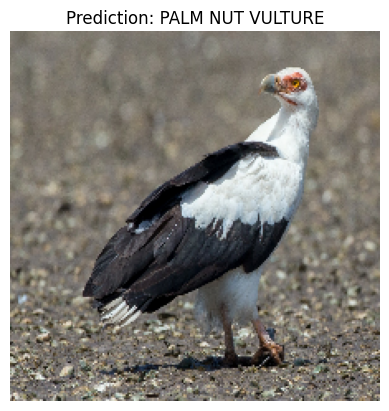

In [16]:
pred_and_plot(model=efficient_model,
              filename="/kaggle/input/birdspecies/palmutvulture.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 39ms/step


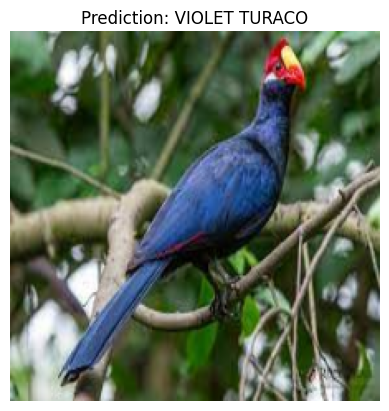

In [17]:
pred_and_plot(model=efficient_model,
              filename="/kaggle/input/birdspecies/violet_turaco.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 40ms/step


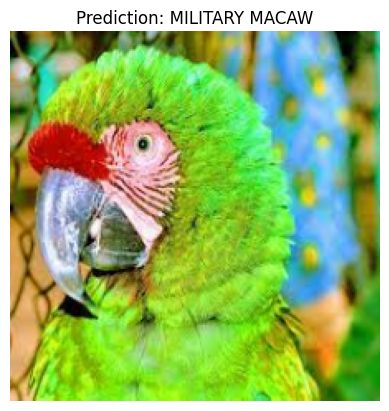

In [18]:
pred_and_plot(model=efficient_model,
              filename="/kaggle/input/birdspecies/miltary_macaw.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 42ms/step


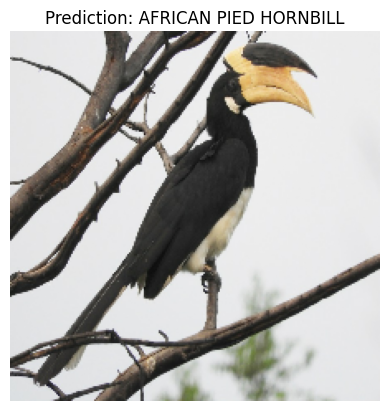

In [19]:
pred_and_plot(model=efficient_model,
              filename="/kaggle/input/birdspecies/malbarpied_hornbill.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 40ms/step


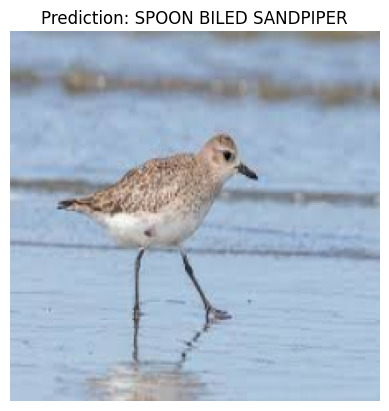

In [20]:
pred_and_plot(model=efficient_model,
              filename="/kaggle/input/birdspecies/grey_plover.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 39ms/step


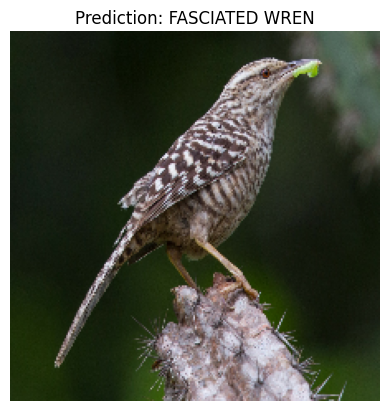

In [21]:
pred_and_plot(model=efficient_model,
              filename="/kaggle/input/birdspecies/fasciated_wren.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 43ms/step


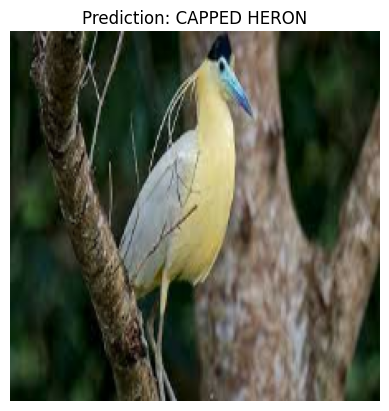

In [22]:
pred_and_plot(model=efficient_model,
              filename="/kaggle/input/birdspecies/capped_heron.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 39ms/step


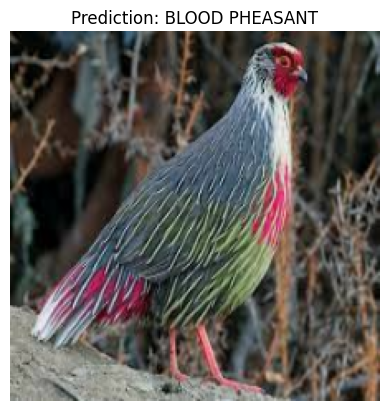

In [23]:
pred_and_plot(model=efficient_model,
              filename="/kaggle/input/birdspecies/blood_pheasent.jpeg",
              class_names=class_names)

**Evaluating loss and accuracy curves**

In [24]:
# Let's create a function to plot our loss curves...
import matplotlib.pyplot as plt

# Plot the validation and training curves
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow History object.

  Returns:
    Plots of training/validation loss and accuracy metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();


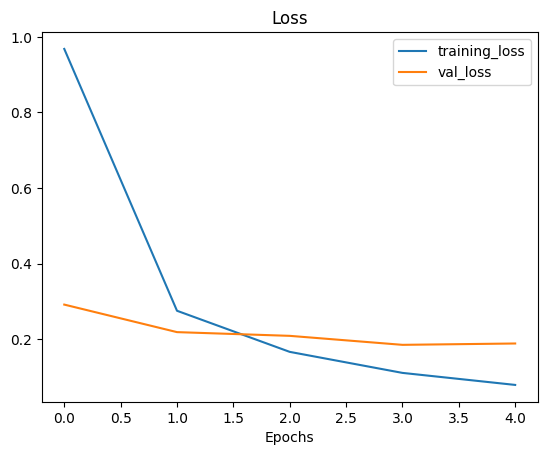

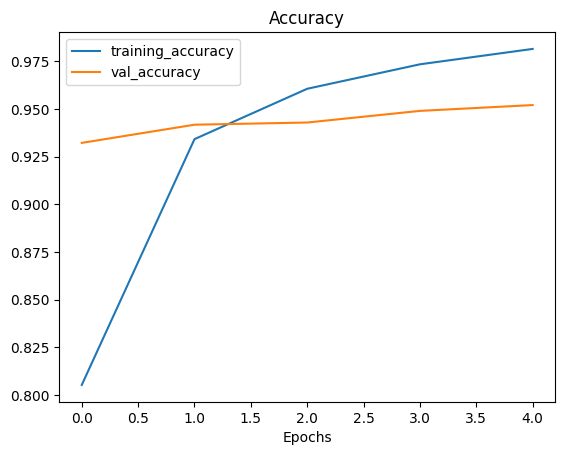

In [25]:
plot_loss_curves(history)

**Accuracy of the model**

In [27]:
efficient_model.evaluate(test_data)

83/83 [==============================] - 28s 338ms/step - loss: 0.1096 - accuracy: 0.9684


[0.10958771407604218, 0.9683809280395508]